In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Store filepath in a variable
file_one = "Resources/DJIA.csv"
file_two = "Resources/NASDAQ100.csv"
file_three = "Resources/SP500.csv"
file_four = "Resources/HPI_master.csv"

In [3]:
# Read our Data files with the pandas library and create DF
DJIA_df = pd.read_csv(file_one)

# Separate out the month and year cols
DJIA_df['year'] = pd.DatetimeIndex(DJIA_df['DATE']).year
DJIA_df['month'] = pd.DatetimeIndex(DJIA_df['DATE']).month

# Filter everything before 2009 out (Which just happens to be the year here)
DJIA_df = DJIA_df[DJIA_df.year >= 2009]
# We also need to filter the other end of the data because stock data ends at Jan 2019, HPI data ends at March 2019. It's easy to just filter by year so we can lose the months.
#Trying to filter out just the last two months may be harder but would give us Jan 2019 data when plotting.
DJIA_df = DJIA_df[DJIA_df.year <= 2018]


#Drop junk rows with VALUE of "."
DJIA_df.drop(DJIA_df[DJIA_df.VALUE == "."].index, inplace=True)

#Convert the rest to floats
DJIA_df['VALUE'] = DJIA_df['VALUE'].astype(float)

#Group by Year, Month and average the 30 days
DJIA_df_mean = DJIA_df.groupby(['year','month'])['VALUE'].mean().pct_change()

DJIA_df_mean = DJIA_df_mean * 100


In [4]:
NAS_df = pd.read_csv(file_two)

NAS_df['year'] = pd.DatetimeIndex(NAS_df['DATE']).year
NAS_df['month'] = pd.DatetimeIndex(NAS_df['DATE']).month

NAS_df = NAS_df[NAS_df.year >= 2009]
NAS_df = NAS_df[NAS_df.year <= 2018]

NAS_df.drop(NAS_df[NAS_df.VALUE == "."].index, inplace=True)

NAS_df['VALUE'] = NAS_df['VALUE'].astype(float)

NAS_df_mean = NAS_df.groupby(['year','month'])['VALUE'].mean().pct_change()

NAS_df_mean = NAS_df_mean * 100

In [5]:
SP500_df = pd.read_csv(file_three)

SP500_df['year'] = pd.DatetimeIndex(SP500_df['DATE']).year
SP500_df['month'] = pd.DatetimeIndex(SP500_df['DATE']).month

SP500_df = SP500_df[SP500_df.year >= 2009]
SP500_df = SP500_df[SP500_df.year <= 2018]

SP500_df.drop(SP500_df[SP500_df.VALUE == "."].index, inplace=True)

SP500_df['VALUE'] = SP500_df['VALUE'].astype(float)

SP500_df_mean = SP500_df.groupby(['year','month'])['VALUE'].mean().pct_change()

SP500_df_mean = SP500_df_mean * 100

Regarding index_sa vs index_nsa

Q: For those HPIs that are seasonally adjusted, what approach is used in performing the seasonal adjustment?

A: The Census Bureau's X-12 ARIMA procedure is used, as implemented in the SAS software package. The automated ARIMA model-selection algorithm in X-12 is employed, which searches through a series of seasonality structures and selects the first that satisfies the Ljung-Box test for serial correlation.

In [6]:
HPI_df = pd.read_csv(file_four)
HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month"})

HPI_df = HPI_df[HPI_df.year >= 2009]
HPI_df = HPI_df[HPI_df.year <= 2018]
HPI_df = HPI_df.drop(HPI_df[HPI_df.frequency == "quarterly"].index)

#We must mean this as well. There are too many units of data per MonthYear
#This means we can also isolate them by region later. 
HPI_df_mean = HPI_df.groupby(["year", "month"])["index_nsa"].mean()


In [7]:
#In order to plot the date, we need a column of "datetime" object and our current columns don't work

#Removes the grouped-by index and turns them into columns, resetting index into 0's 
DJIA_reorganized = DJIA_df_mean.reset_index()

#datetime requires a day. We don't have a day specified so we'll just assign it to the first of every month.
DJIA_reorganized["day"] = 1

#we create a new column "Date" to house the new datetime object.
DJIA_reorganized["Date"] = pd.to_datetime(DJIA_reorganized[["year", "month", "day"]])


#This x_axis shoudl work for all plots now.
x_axis = DJIA_reorganized["Date"]

#And we create the Y axis from the values of SP500.
DJIA_y = DJIA_reorganized["VALUE"].rolling(6).mean()
DJIA_y = DJIA_y.rename('DJIA')
#plt.plot_date(x_axis, DJIA_y,linewidth=1, linestyle="--", marker="" )



In [8]:
#In order to plot the date, we need a column of "datetime" object and our current columns don't work

#Removes the grouped-by index and turns them into columns, resetting index into 0's 
NAS_reorganized = NAS_df_mean.reset_index()

#datetime requires a day. We don't have a day specified so we'll just assign it to the first of every month.
NAS_reorganized["day"] = 1

#we create a new column "Date" to house the new datetime object.
NAS_reorganized["Date"] = pd.to_datetime(NAS_reorganized[["year", "month", "day"]])


#This x_axis shoudl work for all plots now.
x_axis = NAS_reorganized["Date"]

#And we create the Y axis from the values of SP500.
NAS_y = NAS_reorganized["VALUE"].rolling(6).mean()
NAS_y = NAS_y.rename('NAS')
#plt.plot_date(x_axis, SP500_y,linewidth=1, linestyle="--", marker="" )

In [9]:
#In order to plot the date, we need a column of "datetime" object and our current columns don't work

#Removes the grouped-by index and turns them into columns, resetting index into 0's 
SP500_reorganized = SP500_df_mean.reset_index()

#datetime requires a day. We don't have a day specified so we'll just assign it to the first of every month.
SP500_reorganized["day"] = 1

#we create a new column "Date" to house the new datetime object.
SP500_reorganized["Date"] = pd.to_datetime(SP500_reorganized[["year", "month", "day"]])


#This x_axis shoudl work for all plots now.
x_axis = SP500_reorganized["Date"]

#And we create the Y axis from the values of SP500.
SP500_y = SP500_reorganized["VALUE"].rolling(6).mean()
SP500_y = SP500_y.rename('SP500')

#plt.plot_date(x_axis, SP500_y,linewidth=1, linestyle="--", marker="" )

C:\Users\Vicky\anaconda\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


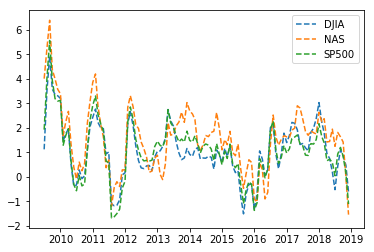

In [10]:

plt.plot_date(x_axis, DJIA_y,linewidth=1.5, linestyle="--", marker="")

plt.plot_date(x_axis, NAS_y,linewidth=1.5, linestyle="--", marker="")

plt.plot_date(x_axis, SP500_y,linewidth=1.5, linestyle="--", marker="")
plt.legend()


In [11]:
#DJIA_y.head(100)